In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pdb
import pandas as pd

# all units SI (meters, kg, etc.)
distance = 7
height = 2.495
m = 0.141748
R_l = 0.0508
R_u = 0.03175
R_b = 0.0889
A = 0.0248286665
interval = 0.001
run = True

In [19]:
def iterate():
    global run
    for w_r in range(30,600): #6380 falcon 500 rpm in radians/s
        for theta in range(15,65):
            if(run):
                trajectory(w_r, theta*math.pi/180)
    #print("done")
    run = True

In [20]:
def trajectory(w, theta):
    v_i = (w*R_l + 9/16*w*R_u)/2
    #print(v)
    s = (0.51)*(w*R_l - (9/16)*w*R_u)/(2*math.pi*R_b)
    runPath(w,v_i,s,theta)

In [24]:
def runPath(w,v_i,s,theta_i):
    t = 0
    v_x = v_i*math.cos(theta_i)
    v_y = v_i*math.sin(theta_i)
    theta = theta_i
    x_dist = 0
    y_dist = 0
    through = True
    x = [0]
    y = [0]
    while(through):
        x_dist += v_x*interval
        y_dist += v_y*interval
        x.append(x_dist)
        y.append(y_dist)
        v_n = math.sqrt(v_x*v_x + v_y*v_y)
        theta = angle(v_x,v_y)
     
        magnus = magnusF(s, v_n)
        drag = dragF(v_n)
        v_x -= (magnus*math.sin(theta) + drag*math.cos(theta))*interval
        v_y -= (drag*math.sin(theta) + 9.8 - magnus*math.cos(theta))*interval
        t += interval
        
        if(((x_dist > distance - .015) and (x_dist < distance + .015)) and ((y_dist > height - .015) and (y_dist < height + .015))):
            through = False
            global w_min
            plt.plot(x,y)
#             omega_array.append(round(w*60/(2*math.pi),2))
#             theta_array.append(round(theta_i*180/math.pi,2))
#             velocity_array.append(round(v_i,2))
#             spin_array.append(round(s,2))
#             time_array.append(round(t,3))
            print ("motor_rpm: " + str(round(w*60/(2*math.pi),2)) + " angle: " + str(round(theta_i*180/math.pi,2)))
            print("velocity: " + str(round(v_i,2)) + " spin: " + str(round(s,2)) + " time: " + str(round(t,3)))
            print()  
        if((x_dist > (distance + 0.2)) or (y_dist < 0)):
            through = False
        if(y_dist > 3.5):
            through = False
      

In [25]:
def magnusF(s,v):
    return (0.1)*(16/3)*(math.pi*math.pi)*1.229*(R_b**3)*s*v/m
def dragF(v):
    return (0.47)*(1.229/2)*A*(v**2)/m
def angle(x,y):
    return math.atan(y/x)

running at distance: 6.53
motor_rpm: 3027.13 angle: 46.0
velocity: 10.88 spin: 9.53 time: 1.185

motor_rpm: 3027.13 angle: 47.0
velocity: 10.88 spin: 9.53 time: 1.217

motor_rpm: 3027.13 angle: 48.0
velocity: 10.88 spin: 9.53 time: 1.251

motor_rpm: 3036.68 angle: 45.0
velocity: 10.92 spin: 9.56 time: 1.153

motor_rpm: 3036.68 angle: 49.0
velocity: 10.92 spin: 9.56 time: 1.287

motor_rpm: 3036.68 angle: 50.0
velocity: 10.92 spin: 9.56 time: 1.322

motor_rpm: 3046.23 angle: 44.0
velocity: 10.95 spin: 9.59 time: 1.122

motor_rpm: 3046.23 angle: 50.0
velocity: 10.95 spin: 9.59 time: 1.324

motor_rpm: 3055.77 angle: 43.0
velocity: 10.99 spin: 9.62 time: 1.094

motor_rpm: 3055.77 angle: 51.0
velocity: 10.99 spin: 9.62 time: 1.358

motor_rpm: 3065.32 angle: 43.0
velocity: 11.02 spin: 9.65 time: 1.095

motor_rpm: 3074.87 angle: 42.0
velocity: 11.05 spin: 9.68 time: 1.064

motor_rpm: 3093.97 angle: 41.0
velocity: 11.12 spin: 9.74 time: 1.035

motor_rpm: 3103.52 angle: 41.0
velocity: 11.16 spin

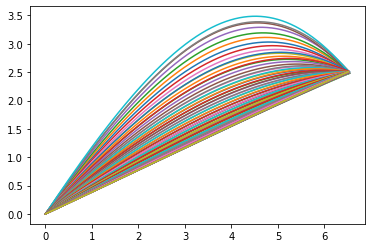

In [26]:
distance = 6.84
print("running at distance: " + str(distance))

iterate()
